# Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import skmultilearn

import scipy
from scipy.io import arff

from IPython.display import Image
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import hamming_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm

import matplotlib.pyplot as plt

from scipy import interp
from scipy.sparse import csr_matrix

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import BRkNNaClassifier
from skmultilearn.ensemble import RakelD

# Import datasets

In [2]:
def isThereNullVal(data):
    a=[]
    for i in range(len(data.isnull().sum())):
            if data.isnull().sum()[i]>0:
                a.append(data.isnull().sum()[i])
                print (data.columns[i],data.isnull().sum()[i])
    print('Conclusion: There are ',len(a),' NULL values')

### Student performance dataset

In [3]:
student_mat=pd.read_csv('C:\\Users\\Dusica\\Downloads\\student\\student-mat.csv',sep=';')
student_por=pd.read_csv('C:\\Users\\Dusica\\Downloads\\student\\student-por.csv',sep=';')

In [4]:
student = pd.merge(student_mat,student_por, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

### Yeast dataset

In [5]:
yeast, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast.arff')
yeast = pd.DataFrame(yeast)

### Emotions dataset

In [6]:
emotions, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/emotions/emotions.arff')
emotions = pd.DataFrame(emotions)

### Scene dataset

In [7]:
scene, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/scene/scene.arff')
scene = pd.DataFrame(scene)

### All datasets

In [8]:
listDF=[]
listDF.append(student)
listDF.append(yeast)
listDF.append(emotions)
listDF.append(scene)
ListDFNames=['Student performance','Yeast','Emotions','Scene']

In [9]:
type(listDF[1])

pandas.core.frame.DataFrame

### Descriptive statistics - Student performance

In [10]:
student.shape

(382, 53)

In [11]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
student.describe()

,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [13]:
student.select_dtypes(include=['object']).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian_x,schoolsup_x,...,higher_x,internet,romantic_x,guardian_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y
count,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
unique,2,2,2,2,2,5,5,4,3,2,...,2,2,2,3,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,...,yes,yes,no,mother,no,yes,no,yes,yes,no
freq,342,198,301,278,344,138,211,140,275,331,...,364,324,261,275,332,239,356,200,364,259


In [14]:
pd.concat([student.dtypes,student.isnull().sum()],axis=1)

,0,1
school,object,0
sex,object,0
age,int64,0
address,object,0
famsize,object,0
Pstatus,object,0
Medu,int64,0
Fedu,int64,0
Mjob,object,0
Fjob,object,0


In [15]:
isThereNullVal(student)

Conclusion: There are  0  NULL values


### Cleaning data

##### Categorical variables

In [16]:
student.select_dtypes(include=['object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian_x', 'schoolsup_x', 'famsup_x', 'paid_x',
       'activities_x', 'nursery', 'higher_x', 'internet', 'romantic_x',
       'guardian_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y'],
      dtype='object')

#### Dummy variables

In [17]:
dummies=pd.get_dummies(student[student.select_dtypes(include=['object']).columns])

In [18]:
student_dummies=student.drop(student[student.select_dtypes(include=['object']).columns], axis=1)

In [19]:
student_dummies=student_dummies.join(dummies)

In [20]:
student_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime_x', 'studytime_x', 'failures_x',
       'famrel_x', 'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x',
       'absences_x', 'G1_m', 'G2_m', 'G3_m', 'traveltime_y', 'studytime_y',
       'failures_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y',
       'health_y', 'absences_y', 'G1_p', 'G2_p', 'G3_p', 'school_GP',
       'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_x_father', 'guardian_x_mother', 'guardian_x_other',
       'schoolsup_x_no', 'schoolsup_x_yes', 'famsup_x_no', 'famsup_x_yes',
       'paid_x_no', 'paid_x_yes', 'activities_x_no', 'activities_x_yes',
       'nursery_no', 'nursery_yes',

In [21]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1_p"),student_dummies.columns.get_loc("G3_p")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

In [22]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1_m"),student_dummies.columns.get_loc("G3_m")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

### Descriptive statistics - Yeast 

In [23]:
yeast.shape

(2417, 117)

In [24]:
yeast.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [25]:
col_vals=yeast.iloc[:,-1] .unique()
for i in range(len(yeast)):
    for j in range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1):
        if col_vals[0]==yeast.iloc[i,j]:
            yeast.iloc[i,j] =0
        if col_vals[1]==yeast.iloc[i,j]:         
            yeast.iloc[i,j] =1
yeast.iloc[:,range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1)]=yeast.iloc[:,range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1)].apply(pd.to_numeric)

In [26]:
for i in range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1):
      print(yeast.iloc[:,i].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]


In [27]:
yeast.head(1)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.04185,0.066938,-0.056617,...,0,0,1,1,0,0,0,1,1,0


In [28]:
yeast.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,0.298717,0.247000,0.177079,0.198593,0.073645,0.104675,0.119570,0.751345,0.744311,0.014067
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.457790,0.431356,0.381815,0.399024,0.261246,0.306198,0.324525,0.432323,0.436338,0.117792
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
pd.concat([yeast.dtypes,yeast.isnull().sum()],axis=1)

,0,1
Att1,float64,0
Att2,float64,0
Att3,float64,0
Att4,float64,0
Att5,float64,0
Att6,float64,0
Att7,float64,0
Att8,float64,0
Att9,float64,0
Att10,float64,0


In [30]:
isThereNullVal(yeast)

Conclusion: There are  0  NULL values


### Descriptive statistics - Emotions

In [31]:
emotions.shape

(593, 78)

In [32]:
emotions.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


In [33]:
col_vals=emotions.iloc[:,-1] .unique()
for i in range(len(emotions)):
    for j in range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1):
        if col_vals[0]==emotions.iloc[i,j]:
            emotions.iloc[i,j] =0
        if col_vals[1]==emotions.iloc[i,j]:         
            emotions.iloc[i,j] =1
emotions.iloc[:,range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1)]=emotions.iloc[:,range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1)].apply(pd.to_numeric)

In [34]:
for i in range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1):
      print(emotions.iloc[:,i].unique())

[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]


In [35]:
emotions.head(5)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0


In [36]:
emotions.describe()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,2.099494,0.412940,0.354901,0.959906,0.291737,0.279933,0.445194,0.249578,0.283305,0.318718
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.316040,0.339559,0.362262,0.651827,0.454946,0.449345,0.497407,0.433134,0.450984,0.466373
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,2.000000,0.179411,0.099424,0.513974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,2.000000,0.309902,0.246193,0.804229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,2.000000,0.529859,0.472593,1.242089,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,3.000000,1.795128,1.797765,3.422899,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
pd.concat([emotions.dtypes,emotions.isnull().sum()],axis=1)

,0,1
Mean_Acc1298_Mean_Mem40_Centroid,float64,0
Mean_Acc1298_Mean_Mem40_Rolloff,float64,0
Mean_Acc1298_Mean_Mem40_Flux,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_0,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_1,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_2,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_3,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_4,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_5,float64,0
Mean_Acc1298_Mean_Mem40_MFCC_6,float64,0


In [38]:
isThereNullVal(emotions)

Conclusion: There are  0  NULL values


### Descriptive statistics - Scene

In [39]:
scene.shape

(2407, 300)

In [40]:
scene.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,b'1',b'0',b'0',b'0',b'1',b'0'
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,b'1',b'0',b'0',b'0',b'0',b'0'
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,b'1',b'0',b'0',b'0',b'0',b'0'
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,b'1',b'0',b'0',b'0',b'0',b'0'


In [41]:
scene.iloc[:,i] =scene.iloc[:,i] .replace(scene.iloc[:,i] .unique()[1], 1)

In [42]:
for i in range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1):
    scene.iloc[:,i] =scene.iloc[:,i] .replace(scene.iloc[:,i] .unique()[1], 1)
    scene.iloc[:,i]  =scene.iloc[:,i] .replace(scene.iloc[:,i] .unique()[0], 0)  
    
col_vals=scene.iloc[:,-1] .unique()
for i in range(len(scene)):
    for j in range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1):
        if col_vals[0]==scene.iloc[i,j]:
            scene.iloc[i,j] =0
        if col_vals[1]==scene.iloc[i,j]:         
            scene.iloc[i,j] =1
scene.iloc[:,range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1)]=scene.iloc[:,range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1)].apply(pd.to_numeric)

In [43]:
for i in range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1):
      print(scene.iloc[:,i].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [44]:
scene.head(3)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,0,0,0,0,0,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,0,0,0,0,1,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,0,0,0,0,1,0


In [45]:
scene.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,...,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000
mean,0.658669,0.694148,0.715307,0.721717,0.713643,0.690993,0.653925,0.652328,0.686060,0.707412,...,0.119322,0.117860,0.112393,0.110179,0.822601,0.151226,0.164936,0.179892,0.778563,0.179061
std,0.213751,0.198882,0.188399,0.185636,0.187857,0.200795,0.219823,0.198750,0.180039,0.168036,...,0.159064,0.156272,0.149826,0.149425,0.382086,0.358343,0.371200,0.384177,0.415301,0.383483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534945,0.578996,0.612401,0.614904,0.608947,0.583404,0.531731,0.540349,0.577471,0.607320,...,0.021149,0.020905,0.021072,0.019841,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.681079,0.718068,0.737771,0.743758,0.734662,0.716582,0.685605,0.677021,0.707229,0.723166,...,0.063346,0.063062,0.059217,0.056948,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.819445,0.843483,0.857111,0.863527,0.854056,0.840869,0.817084,0.791899,0.819788,0.831932,...,0.155334,0.153047,0.138648,0.137369,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
pd.concat([scene.dtypes,scene.isnull().sum()],axis=1)

,0,1
Att1,float64,0
Att2,float64,0
Att3,float64,0
Att4,float64,0
Att5,float64,0
Att6,float64,0
Att7,float64,0
Att8,float64,0
Att9,float64,0
Att10,float64,0


# Multi class classification
# 1. Problem transformation methods

##     a)The binary relevance method (BR)
the simplest problem transformation method
BR learns a binary classifier for each label

--- labels are predicted independently of each other and label dependencies are not taken into account.

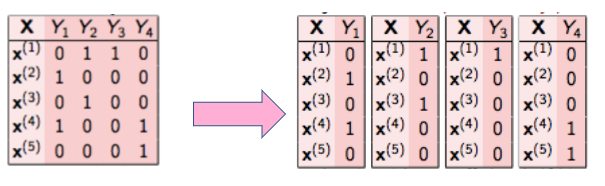

In [47]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\BinaryRelevance2.png",width=500, height=300)

In [54]:
#classifier = BinaryRelevance(RandomForestClassifier())
#classifier = BinaryRelevance(GaussianNB())
#classifier = BinaryRelevance(LogisticRegression())

In [48]:
#Predict model-methods for Binary relevance(br), Classifier chains(cc), Label powerset(lp)
def predictModel(a_train, a_test, b_train, b_test,signal):
    if signal=='br':
        classifier = BinaryRelevance(LogisticRegression())
    if signal=='cc':
        classifier = ClassifierChain(LogisticRegression())
    if signal=='lp':
        classifier = LabelPowerset(LogisticRegression())
        
    classifier.fit(a_train, b_train)
    predictions = classifier.predict(a_test)
    probas=classifier.predict_proba(a_test)
    return predictions,probas

In [49]:
#method for creating table with measures
def  showMeMeasuresPrettyTable(y_test,predictions):
    t = PrettyTable(['Measures', 'Value'])
    t.add_row(['Accuracy',accuracy_score(y_test,predictions)])
    t.add_row(['Macro-Precision',precision_score(y_test,predictions,average='macro')])
    t.add_row(['Micro-Precision',precision_score(y_test,predictions,average='micro')])
    t.add_row(['Macro-Recall',recall_score(y_test,predictions,average='macro')])
    t.add_row(['Micro-Recall',recall_score(y_test,predictions,average='micro')])
    t.add_row(['Macro-F1',f1_score(y_test,predictions.toarray(),average='macro')])
    t.add_row(['Micro-F1',f1_score(y_test,predictions,average='micro')])
    t.add_row(['0/1 loss',zero_one_loss(y_test,predictions)])
    t.add_row(['Hamming loss',hamming_loss(y_test,predictions)])
    t.add_row(['Roc auc score',roc_auc_score(y_test,predictions.todense(), average='macro')])
    print (t)

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [50]:
x_student=student_dummies.drop(['G1_p', 'G2_p', 'G3_p', 'G1_m', 'G2_m', 'G3_m'],axis=1)

In [51]:
y_student=student_dummies[['G1_p', 'G2_p', 'G3_p', 'G1_m', 'G2_m', 'G3_m']]

In [52]:
a_train_student, a_test_student, b_train_student, b_test_student = train_test_split(x_student,y_student, test_size=0.3, random_state=42)

In [53]:
predictions_student,probas_student=predictModel(a_train_student, a_test_student, b_train_student, b_test_student,'br')

In [55]:
predictions_student.todense()[0:5]

matrix([[1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]], dtype=int32)

In [56]:
showMeMeasuresPrettyTable(b_test_student,predictions_student)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.486956521739   |
| Macro-Precision |    0.824694222729   |
| Micro-Precision |    0.833049403748   |
|   Macro-Recall  |    0.928939362825   |
|   Micro-Recall  |    0.936781609195   |
|     Macro-F1    |    0.87329523731    |
|     Micro-F1    |    0.881875563571   |
|     0/1 loss    |    0.513043478261   |
|   Hamming loss  | 0.18985507246376812 |
|  Roc auc score  |    0.659056260145   |
+-----------------+---------------------+


## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [57]:
y_yeast=yeast.loc[:,"Class1":"Class14"]

In [58]:
y_yeast.shape

(2417, 14)

In [59]:
x_yeast=yeast.drop(y_yeast,axis=1)

In [60]:
x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test = train_test_split(x_yeast,y_yeast, test_size=0.3, random_state=42)

In [61]:
predictions_yeast,probas_yeast = predictModel(x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test,'br')

In [62]:
predictions_yeast.todense()

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        ..., 
        [0, 0, 0, ..., 1, 1, 0],
        [1, 1, 0, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 1, 0]], dtype=int64)

In [63]:
predictions_yeast.todense().shape

(726, 14)

In [64]:
# Macro precision and therefore F1 are ill-defined
#This warning means that precision, and consequently f1 score, are undefined for some samples whose tp + fp is zero which results in 0 / 0 when calculating precision for that sample. Because f1 score is a function of precision, it is also undefined and both are set to 0.0 by the library.

In [65]:
#One way to resolve it
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [66]:
showMeMeasuresPrettyTable(y_yeast_test,predictions_yeast)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.137741046832   |
| Macro-Precision |   0.477296285181   |
| Micro-Precision |   0.724222585925   |
|   Macro-Recall  |   0.32890888418    |
|   Micro-Recall  |   0.56968136466    |
|     Macro-F1    |   0.351017688475   |
|     Micro-F1    |   0.637722932805   |
|     0/1 loss    |   0.862258953168   |
|   Hamming loss  | 0.1978551751279024 |
|  Roc auc score  |   0.569061720625   |
+-----------------+--------------------+


In [158]:
probas_yeast.todense()[1,:]

matrix([[ 0.15128502,  0.27048296,  0.36740188,  0.18691966,  0.18549471,
          0.27932198,  0.26927858,  0.37570247,  0.19348743,  0.23414507,
          0.19478397,  0.63595707,  0.61364002,  0.02490164]])

## Emotions dataset
#### TARGET LABELS ["amazed-suprised":"angry-aggresive"] 

In [68]:
y_emotions=emotions.loc[:,"amazed-suprised":"angry-aggresive"]

In [69]:
y_emotions.shape

(593, 6)

In [70]:
x_emotions=emotions.drop(y_emotions,axis=1)

In [71]:
x_emotions_train, x_emotions_test, y_emotions_train, y_emotions_test = train_test_split(x_emotions,y_emotions, test_size=0.3, random_state=42)

In [72]:
predictions_emotions,probas_emotions = predictModel(x_emotions_train, x_emotions_test, y_emotions_train, y_emotions_test,'br')

In [73]:
predictions_emotions.todense()

matrix([[0, 1, 1, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ..., 
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1]], dtype=int64)

In [74]:
predictions_emotions.todense().shape

(178, 6)

In [75]:
showMeMeasuresPrettyTable(y_emotions_test,predictions_emotions)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.269662921348   |
| Macro-Precision |   0.692974564367   |
| Micro-Precision |     0.72265625     |
|   Macro-Recall  |   0.553892708599   |
|   Micro-Recall  |   0.555555555556   |
|     Macro-F1    |   0.604400599739   |
|     Micro-F1    |   0.62818336163    |
|     0/1 loss    |   0.730337078652   |
|   Hamming loss  | 0.2050561797752809 |
|  Roc auc score  |   0.725433842718   |
+-----------------+--------------------+


## Scene dataset
#### TARGET LABELS ["Beach":"Urban"] 

In [76]:
y_scene=scene.loc[:,"Beach":"Urban"]

In [77]:
y_scene.shape

(2407, 6)

In [78]:
x_scene=scene.drop(y_scene,axis=1)

In [79]:
x_scene_train, x_scene_test, y_scene_train, y_scene_test = train_test_split(x_scene,y_scene, test_size=0.3, random_state=42)

In [80]:
predictions_scene,probas_scene= predictModel(x_scene_train, x_scene_test, y_scene_train, y_scene_test,'br')

In [81]:
predictions_scene.todense()

matrix([[1, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        ..., 
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 1, 0]], dtype=int64)

In [82]:
predictions_scene.todense().shape

(723, 6)

In [83]:
showMeMeasuresPrettyTable(y_scene_test,predictions_scene)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.544951590595   |
| Macro-Precision |    0.859636915205   |
| Micro-Precision |    0.880733944954   |
|   Macro-Recall  |    0.773262354432   |
|   Micro-Recall  |    0.86851628468    |
|     Macro-F1    |    0.810329807131   |
|     Micro-F1    |    0.874582447616   |
|     0/1 loss    |    0.455048409405   |
|   Hamming loss  | 0.09520516366989396 |
|  Roc auc score  |    0.800006810947   |
+-----------------+---------------------+


## BINARY RELEVANCE 
#### Shorter way -- through a method and for loop

In [84]:
# with a train_test_split done at the beginning
## SAME VALUES as in separate datasets

In [85]:
all_a_train=[a_train_student,x_yeast_train,x_emotions_train,x_scene_train]
all_b_train=[b_train_student,y_yeast_train,y_emotions_train,y_scene_train]
all_a_test=[a_test_student,x_yeast_test,x_emotions_test,x_scene_test]
all_b_test=[b_test_student,y_yeast_test,y_emotions_test,y_scene_test]
Listpredictions=[predictions_student,predictions_yeast,predictions_emotions,predictions_scene]

In [86]:
len(Listpredictions)

4

In [87]:
def getMeasuresTableForBinaryRelevance2(dataframes,dfnames,all_a_train,all_a_test,all_b_train,all_b_test,predictions):
    t = PrettyTable(['Measures'])
    t.add_row(['Accuracy'])
    t.add_row(['Macro-Precision'])
    t.add_row(['Micro-Precision'])
    t.add_row(['Macro-Recall'])
    t.add_row(['Micro-Recall'])
    t.add_row(['Macro-F1'])
    t.add_row(['Micro-F1'])
    t.add_row(['0/1 loss'])
    t.add_row(['Hamming loss'])
    t.add_row(['Roc auc score'])

    #,roc_auc_score(b_test,predictionstodense(),average='macro')
    for i in range(len(dataframes)):

        a_train, a_test, b_train, b_test = all_a_train[i],all_a_test[i],all_b_train[i],all_b_test[i]
        
        t.add_column(dfnames[i],[accuracy_score(b_test,predictions[i]),precision_score(b_test,predictions[i],average='micro')\
        ,precision_score(b_test,predictions[i],average='macro')\
        ,recall_score(b_test,predictions[i],average='macro')\
        ,recall_score(b_test,predictions[i],average='micro')\
        ,f1_score(b_test,predictions[i],average='macro')\
        ,f1_score(b_test,predictions[i],average='micro')\
        ,zero_one_loss(b_test,predictions[i])\
        ,hamming_loss(b_test,predictions[i])\
        ,roc_auc_score(b_test,predictions[i].todense(),average='macro')])

    print(t) 

In [88]:
print('Binary relevance')
getMeasuresTableForBinaryRelevance2(listDF,ListDFNames,all_a_train,all_a_test,all_b_train,all_b_test,Listpredictions)

Binary relevance
+-----------------+---------------------+--------------------+--------------------+---------------------+
|     Measures    | Student performance |       Yeast        |      Emotions      |        Scene        |
+-----------------+---------------------+--------------------+--------------------+---------------------+
|     Accuracy    |    0.486956521739   |   0.137741046832   |   0.269662921348   |    0.544951590595   |
| Macro-Precision |    0.833049403748   |   0.724222585925   |     0.72265625     |    0.880733944954   |
| Micro-Precision |    0.824694222729   |   0.477296285181   |   0.692974564367   |    0.859636915205   |
|   Macro-Recall  |    0.928939362825   |   0.32890888418    |   0.553892708599   |    0.773262354432   |
|   Micro-Recall  |    0.936781609195   |   0.56968136466    |   0.555555555556   |    0.86851628468    |
|     Macro-F1    |    0.87329523731    |   0.351017688475   |   0.604400599739   |    0.810329807131   |
|     Micro-F1    |    0.8818

In [89]:
plt.style.use('ggplot')
%matplotlib inline

In [161]:
def MakeRocAucPlot( a_train, b_train,a_test,b_test):
    X = a_train
    y = b_train
    plt.figure(figsize=(18,8))


# Binarize the output
    y = label_binarize(y, classes=b_train.columns)
    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(a_train, b_train).decision_function(a_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(b_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves


    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)


    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of '+b_train.columns[i]+' (area = {0:0.2f})'
                                   ''.format(roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [91]:
# HM functions

In [92]:
def GetWantedClasses(a,df):
    proba=pd.DataFrame()
    for i in range(0,len(a)):
        proba[df.columns[a[i]]]=pd.Series(df[df.columns[a[i]]])
    return proba

In [93]:
def GetClassNames(a,df):
        classNames=[]
        for i in range(len(a)):
            classNames.append(df.columns[a[i]])
        return classNames

In [94]:
def All_ROC_AUC_Scores(a_train, b_train,a_test,b_test):
    X = a_train
    y = b_train
    y = label_binarize(y, classes=b_train.columns)
    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(a_train, b_train).decision_function(a_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(b_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
   
    return fpr,tpr,roc_auc


In [95]:
def SelectNROC_AUC_Scores(n,operation,a_train, b_train,a_test,b_test):
   # Compute macro-average ROC curve and ROC area
    fpr,tpr,roc_auc=All_ROC_AUC_Scores(a_train, b_train,a_test,b_test)
    roc_aucs=pd.DataFrame()
   
    for k in roc_auc.keys():
        roc_aucs=roc_aucs.append(pd.concat([pd.Series(k),pd.Series(roc_auc[k])],axis=1))

    roc_aucs.rename_axis({0:''},inplace=True)



    if operation==0:
        return roc_aucs.nlargest(n,columns=1)
    if operation==1:
        return roc_aucs.nsmallest(n,columns=1)

In [96]:
def roc_auc_macro(fpr,tpr,n_classes):
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    roc_auc = dict()
# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return fpr["macro"],tpr["macro"],roc_auc["macro"]

In [97]:
def plotOnlyN(n,operation,a_train, b_train,a_test,b_test):
    df=SelectNROC_AUC_Scores(n,operation,a_train, b_train,a_test,b_test)
    X = a_train 
    
# Binarize the output
    
    y = label_binarize(GetWantedClasses(pd.to_numeric(df[0]).ravel(),b_train),classes=pd.Index(GetClassNames(pd.to_numeric(df[0]).ravel(),b_train)))

    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(a_train, GetWantedClasses(pd.to_numeric(df[0]).ravel(),b_train)).decision_function(a_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(GetWantedClasses(pd.to_numeric(df[0]).ravel(),b_test).iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and ROC area

    fpr2,tpr2,roc_auc2=All_ROC_AUC_Scores(a_train, b_train,a_test,b_test)
    fpr["macro"],tpr["macro"],roc_auc["macro"]=roc_auc_macro(fpr2,tpr2,b_train.shape[1])

# Plot all ROC curves


    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)    
        
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of '+pd.Index(GetClassNames(pd.to_numeric(df[0]).ravel(),b_train))[i]+' (area = {0:0.2f})'
                                   ''.format(roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    return plt.show()


### Student performance 

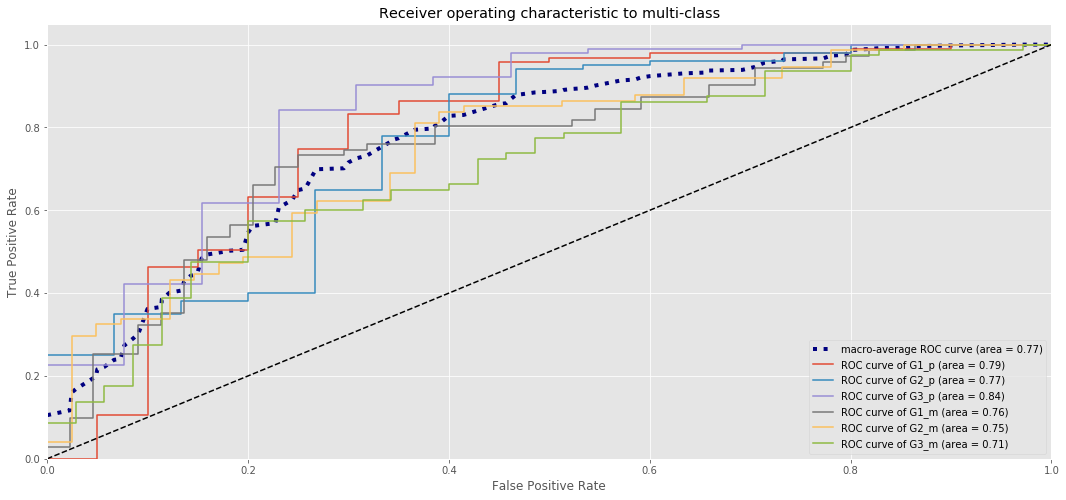

In [162]:
MakeRocAucPlot(a_train_student,b_train_student,a_test_student,b_test_student)

### Yeast

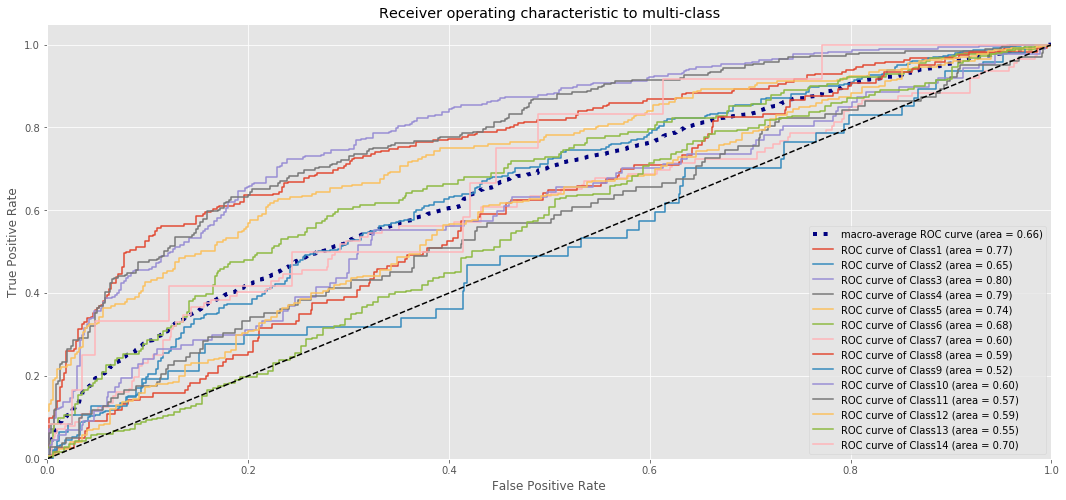

In [163]:
MakeRocAucPlot( x_yeast_train, y_yeast_train,x_yeast_test,y_yeast_test )

### YEAST -  TOP N ROC scores

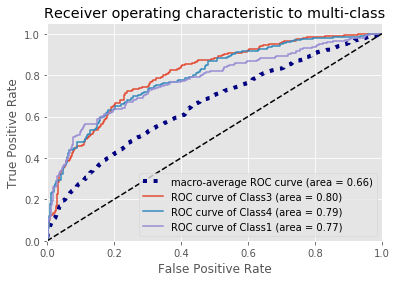

In [100]:
plotOnlyN(3,0,x_yeast_train, y_yeast_train,x_yeast_test,y_yeast_test)

### YEAST - WORST N ROC scores

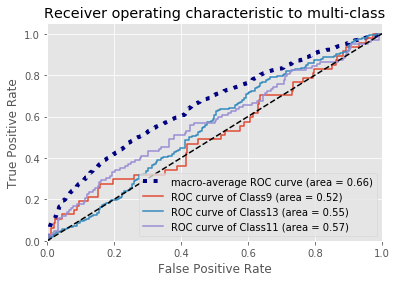

In [101]:
plotOnlyN(3,1,x_yeast_train, y_yeast_train,x_yeast_test,y_yeast_test)

### Emotions

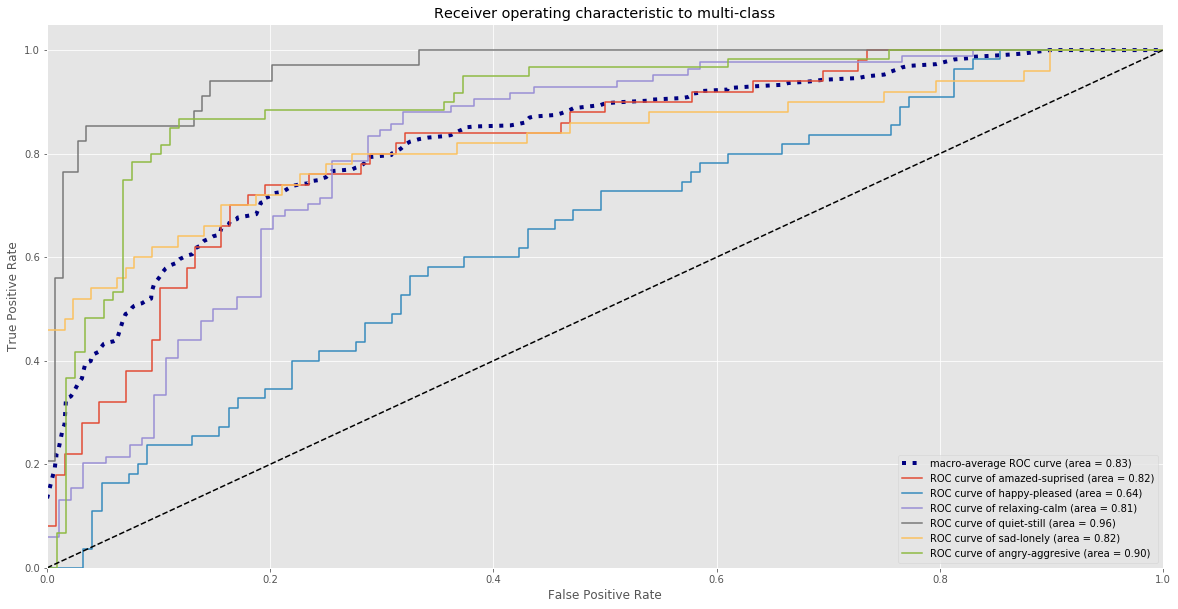

In [102]:
MakeRocAucPlot( x_emotions_train, y_emotions_train,x_emotions_test,y_emotions_test)

### Emotions - WORST N scores

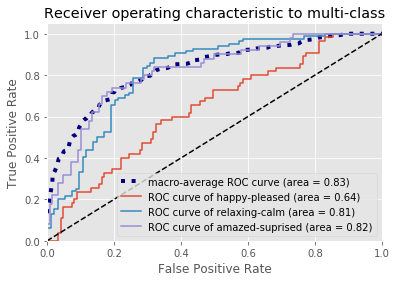

In [103]:
plotOnlyN(3,1,x_emotions_train, y_emotions_train,x_emotions_test,y_emotions_test)

### Scene

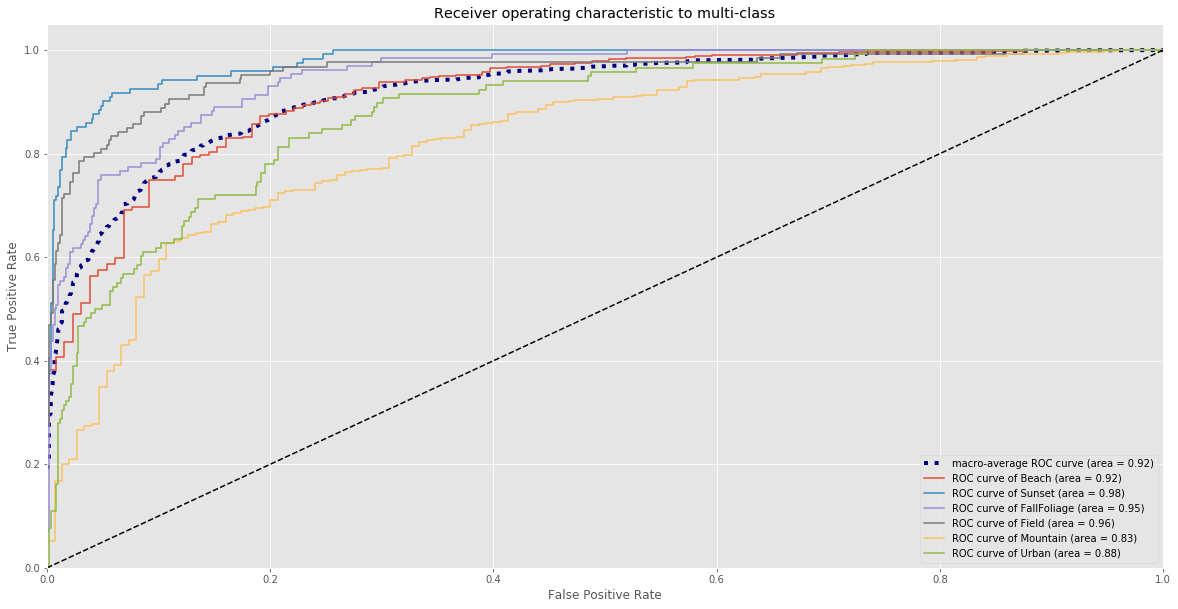

In [104]:
MakeRocAucPlot( x_scene_train, y_scene_train,x_scene_test,y_scene_test)

## b) Classifier Chains
 -The first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

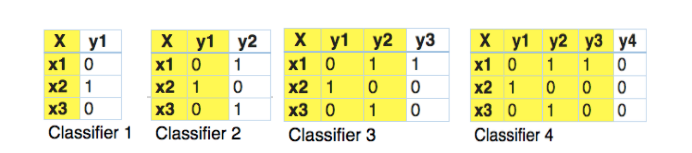

In [105]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\ClassifierChains.png",width=700, height=700)

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [106]:
predictions_student_cc,probas_student_cc = predictModel(a_train_student, a_test_student, b_train_student, b_test_student,'cc')

In [107]:
showMeMeasuresPrettyTable(b_test_student,predictions_student_cc)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.547826086957   |
| Macro-Precision |    0.826677211637   |
| Micro-Precision |    0.835314091681   |
|   Macro-Recall  |    0.93452494841    |
|   Micro-Recall  |    0.942528735632   |
|     Macro-F1    |    0.876852510208   |
|     Micro-F1    |    0.885688568857   |
|     0/1 loss    |    0.452173913043   |
|   Hamming loss  | 0.18405797101449275 |
|  Roc auc score  |    0.674818366822   |
+-----------------+---------------------+


## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [108]:
predictions_yeast_cc,probas_yeast_cc = predictModel(x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test,'cc')

In [109]:
showMeMeasuresPrettyTable(y_yeast_test,predictions_yeast_cc)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.18870523416    |
| Macro-Precision |    0.460509498668   |
| Micro-Precision |    0.664419475655   |
|   Macro-Recall  |    0.364019618343   |
|   Micro-Recall  |    0.570968780174   |
|     Macro-F1    |    0.380057651789   |
|     Micro-F1    |    0.614159598407   |
|     0/1 loss    |    0.81129476584    |
|   Hamming loss  | 0.21930342384887838 |
|  Roc auc score  |    0.579360887923   |
+-----------------+---------------------+


## Emotions dataset

In [110]:
predictions_emotions_cc,probas_emotions_cc = predictModel(x_emotions_train, x_emotions_test, y_emotions_train, y_emotions_test,'cc')

In [111]:
showMeMeasuresPrettyTable(y_emotions_test,predictions_emotions_cc)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.275280898876   |
| Macro-Precision |   0.619591719577   |
| Micro-Precision |   0.650485436893   |
|   Macro-Recall  |   0.601315677786   |
|   Micro-Recall  |   0.603603603604   |
|     Macro-F1    |   0.593340781576   |
|     Micro-F1    |   0.626168224299   |
|     0/1 loss    |   0.724719101124   |
|   Hamming loss  | 0.2247191011235955 |
|  Roc auc score  |   0.723421329114   |
+-----------------+--------------------+


## Scene dataset

In [112]:
predictions_scene_cc,probas_scene_cc = predictModel(x_scene_train, x_scene_test, y_scene_train, y_scene_test,'cc')

In [113]:
showMeMeasuresPrettyTable(y_scene_test,predictions_scene_cc)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.668049792531   |
| Macro-Precision |    0.836267832734   |
| Micro-Precision |    0.86737714624    |
|   Macro-Recall  |    0.819406768792   |
|   Micro-Recall  |     0.8835946924    |
|     Macro-F1    |    0.823561622031   |
|     Micro-F1    |    0.875410815656   |
|     0/1 loss    |    0.331950207469   |
|   Hamming loss  | 0.09612724757952974 |
|  Roc auc score  |    0.827025787609   |
+-----------------+---------------------+


## c) Label Powerset
It transforms the problem into a multi-class problem with one multi-class classifier which is trained on all unique label combinations found in the training data.
x1 and x4 have the same labels, similarly, x3 and x6 have the same set of labels. Label powerset transforms this problem into a single multi-class problem as shown below.
Disadvantage:  The only disadvantage of this is that as the training data increases, number of classes also inreases, and measure values decrease.  

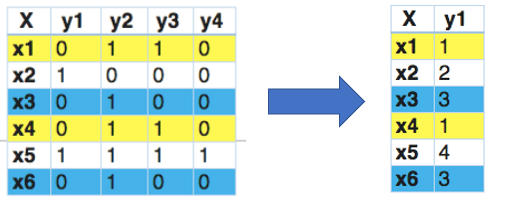

In [114]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\LabelPowerset2.png",width=500, height=300)

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [115]:
predictions_student_lp,probas_student_lp = predictModel(a_train_student, a_test_student, b_train_student, b_test_student,'lp')

In [116]:
showMeMeasuresPrettyTable(b_test_student,predictions_student_lp)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.504347826087   |
| Macro-Precision |    0.824628272115   |
| Micro-Precision |    0.831932773109   |
|   Macro-Recall  |    0.942066518618   |
|   Micro-Recall  |    0.948275862069   |
|     Macro-F1    |    0.878628210012   |
|     Micro-F1    |    0.88630259624    |
|     0/1 loss    |    0.495652173913   |
|   Hamming loss  | 0.18405797101449275 |
|  Roc auc score  |    0.670525163069   |
+-----------------+---------------------+


## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [117]:
predictions_yeast_lp,probas_yeast_lp = predictModel(x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test,'lp')

In [118]:
showMeMeasuresPrettyTable(y_yeast_test,predictions_yeast_lp)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.260330578512   |
| Macro-Precision |    0.441701422407   |
| Micro-Precision |    0.68128342246    |
|   Macro-Recall  |    0.381010132551   |
|   Micro-Recall  |    0.615062761506   |
|     Macro-F1    |    0.382071514401   |
|     Micro-F1    |    0.64648173207    |
|     0/1 loss    |    0.739669421488   |
|   Hamming loss  | 0.20562770562770563 |
|  Roc auc score  |    0.582832240405   |
+-----------------+---------------------+


## Emotions dataset

In [119]:
predictions_emotions_lp,probas_emotions_lp = predictModel(x_emotions_train,x_emotions_test, y_emotions_train,y_emotions_test,'lp')

In [120]:
showMeMeasuresPrettyTable(y_emotions_test,predictions_emotions_lp)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.297752808989   |
| Macro-Precision |   0.635279793736   |
| Micro-Precision |   0.644776119403   |
|   Macro-Recall  |   0.646345811052   |
|   Micro-Recall  |   0.648648648649   |
|     Macro-F1    |   0.63693307948    |
|     Micro-F1    |   0.646706586826   |
|     0/1 loss    |   0.702247191011   |
|   Hamming loss  | 0.2209737827715356 |
|  Roc auc score  |   0.738817102162   |
+-----------------+--------------------+


## Scene dataset

In [121]:
predictions_scene_lp,probas_scene_lp = predictModel(x_scene_train,x_scene_test, y_scene_train,y_scene_test,'lp')

In [122]:
showMeMeasuresPrettyTable(y_scene_test,predictions_scene_lp)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.702627939142   |
| Macro-Precision |    0.842085714148   |
| Micro-Precision |    0.885853066181   |
|   Macro-Recall  |    0.814001783945   |
|   Micro-Recall  |    0.879975874548   |
|     Macro-F1    |    0.827320143275   |
|     Micro-F1    |    0.882904689864   |
|     0/1 loss    |    0.297372060858   |
|   Hamming loss  | 0.08921161825726141 |
|  Roc auc score  |    0.837753671829   |
+-----------------+---------------------+


# 2. Algorithm adaptation methods

Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

multi-label version of kNN is represented by MLkNN

In [164]:
# MLkNN
#Predict model-methods for MLkNN and Binary Relevance multi-label classifier based on k Nearest Neighbours method.
def predictModelAdapt(a_train, a_test, b_train,b_test,signal,k):
        if signal=='mlknn':
            classifier = MLkNN(k=k)
        if signal=='brknn':
            classifier = BRkNNaClassifier(k=k)
        classifier.fit(csr_matrix(a_train.values), csr_matrix(b_train.values))
        predictions = classifier.predict(csr_matrix(a_test.values))
        showMeMeasuresPrettyTable(b_test,predictions)
        return predictions

### STUDENT PERFORMANCE

In [165]:
predictions_student_MLkNN=predictModelAdapt(a_train_student, a_test_student, b_train_student,b_test_student,'mlknn',20)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |        0.4         |
| Macro-Precision |   0.775799307037   |
| Micro-Precision |   0.779141104294   |
|   Macro-Recall  |   0.968711140718   |
|   Micro-Recall  |   0.973180076628   |
|     Macro-F1    |   0.858653858374   |
|     Micro-F1    |   0.865417376491   |
|     0/1 loss    |        0.6         |
|   Hamming loss  | 0.2289855072463768 |
|  Roc auc score  |   0.544306797993   |
+-----------------+--------------------+


In [166]:
predictions_student_BRkNN=predictModelAdapt(a_train_student, a_test_student, b_train_student,b_test_student,'brknn',8)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.452173913043   |
| Macro-Precision |    0.766958266913   |
| Micro-Precision |    0.770739064857   |
|   Macro-Recall  |    0.975520238548   |
|   Micro-Recall  |    0.978927203065   |
|     Macro-F1    |    0.856413775192   |
|     Micro-F1    |    0.862447257384   |
|     0/1 loss    |    0.547826086957   |
|   Hamming loss  | 0.23623188405797102 |
|  Roc auc score  |    0.521119848975   |
+-----------------+---------------------+


### YEAST

In [167]:
predictions_yeast_MLkNN=predictModelAdapt(x_yeast_train, x_yeast_test, y_yeast_train,y_yeast_test,'mlknn',20)   

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.176308539945   |
| Macro-Precision |    0.560095815697   |
| Micro-Precision |    0.716516985553   |
|   Macro-Recall  |    0.367204344742   |
|   Micro-Recall  |    0.590601866752   |
|     Macro-F1    |    0.397100824799   |
|     Micro-F1    |    0.647494707128   |
|     0/1 loss    |    0.823691460055   |
|   Hamming loss  | 0.19657615112160567 |
|  Roc auc score  |    0.588580692651   |
+-----------------+---------------------+


In [168]:
predictions_yeast_BRkNN=predictModelAdapt(x_yeast_train, x_yeast_test, y_yeast_train,y_yeast_test,'brknn',13)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.162534435262   |
| Macro-Precision |   0.602256269106   |
| Micro-Precision |   0.761904761905   |
|   Macro-Recall  |   0.299804741298   |
|   Micro-Recall  |   0.514966205343   |
|     Macro-F1    |   0.348474535407   |
|     Micro-F1    |   0.614557326676   |
|     0/1 loss    |   0.837465564738   |
|   Hamming loss  | 0.1974616292798111 |
|  Roc auc score  |   0.575491067696   |
+-----------------+--------------------+


### Emotions

In [169]:
predictions_emotions_MLkNN=predictModelAdapt(x_emotions_train, x_emotions_test, y_emotions_train,y_emotions_test,'mlknn',20)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.134831460674   |
| Macro-Precision |    0.576633196784   |
| Micro-Precision |    0.638766519824   |
|   Macro-Recall  |    0.40320473644    |
|   Micro-Recall  |    0.435435435435   |
|     Macro-F1    |    0.454738566216   |
|     Micro-F1    |    0.517857142857   |
|     0/1 loss    |    0.865168539326   |
|   Hamming loss  | 0.25280898876404495 |
|  Roc auc score  |    0.643668135466   |
+-----------------+---------------------+


In [170]:
predictions_emotions_BRkNN=predictModelAdapt(x_emotions_train, x_emotions_test, y_emotions_train,y_emotions_test,'brknn',8)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.191011235955   |
| Macro-Precision |   0.54122388991    |
| Micro-Precision |   0.583606557377   |
|   Macro-Recall  |   0.508716153128   |
|   Micro-Recall  |   0.534534534535   |
|     Macro-F1    |   0.513414631313   |
|     Micro-F1    |   0.557993730408   |
|     0/1 loss    |   0.808988764045   |
|   Hamming loss  | 0.2640449438202247 |
|  Roc auc score  |   0.664642431814   |
+-----------------+--------------------+


### Scene

In [171]:
predictions_scene_MLkNN=predictModelAdapt(x_scene_train, x_scene_test, y_scene_train,y_scene_test,'mlknn',20)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.63347164592    |
| Macro-Precision |    0.836593455974   |
| Micro-Precision |    0.874554102259   |
|   Macro-Recall  |    0.822956452179   |
|   Micro-Recall  |    0.887213510253   |
|     Macro-F1    |    0.828162589312   |
|     Micro-F1    |    0.880838323353   |
|     0/1 loss    |    0.36652835408    |
|   Hamming loss  | 0.09174734900875979 |
|  Roc auc score  |    0.829941512365   |
+-----------------+---------------------+


In [172]:
predictions_scene_BRkNN=predictModelAdapt(x_scene_train, x_scene_test, y_scene_train,y_scene_test,'brknn',8)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.634854771784   |
| Macro-Precision |    0.831015889316   |
| Micro-Precision |    0.844837106571   |
|   Macro-Recall  |    0.847235229861   |
|   Micro-Recall  |    0.922798552473   |
|     Macro-F1    |    0.828136787684   |
|     Micro-F1    |    0.882098587489   |
|     0/1 loss    |    0.365145228216   |
|   Hamming loss  | 0.09428307976025818 |
|  Roc auc score  |    0.812495772353   |
+-----------------+---------------------+


## RESULTS

In [140]:
def getMeasuresTablesFinalResults2(classifiers,b_test,predictions):
    t = PrettyTable(['Measures'])
    t.add_row(['Accuracy'])
    t.add_row(['Macro-Precision'])
    t.add_row(['Micro-Precision'])
    t.add_row(['Macro-Recall'])
    t.add_row(['Micro-Recall'])
    t.add_row(['Macro-F1'])
    t.add_row(['Micro-F1'])
    t.add_row(['0/1 loss'])
    t.add_row(['Hamming loss'])
    t.add_row(['Roc auc score'])


    for i in range(len(classifiers)):
        
        t.add_column(classifiers[i].__class__.__name__,[\
        accuracy_score(b_test,predictions[i]),\
        precision_score(b_test,predictions[i],average='macro'),precision_score(b_test,predictions[i],average='micro')\
        ,recall_score(b_test,predictions[i],average='macro')\
        ,recall_score(b_test,predictions[i],average='micro')\
        ,f1_score(b_test,predictions[i],average='macro')\
        ,f1_score(b_test,predictions[i],average='micro')\
        ,zero_one_loss(b_test,predictions[i])\
        ,hamming_loss(b_test,predictions[i])\
        ,roc_auc_score(b_test,predictions[i].todense(),average='macro')])

    print(t) 

In [141]:
classifiers=[BinaryRelevance(LogisticRegression()),ClassifierChain(LogisticRegression()),LabelPowerset(LogisticRegression()),MLkNN(k=20)]

predictions_stud=[predictions_student,predictions_student_cc,predictions_student_lp,predictions_student_MLkNN]
predictions_yeast_all=[predictions_yeast,predictions_yeast_cc,predictions_yeast_lp,predictions_yeast_MLkNN]
predictions_emo=[predictions_emotions,predictions_emotions_cc,predictions_emotions_lp,predictions_emotions_MLkNN]
predictions_scene_all=[predictions_scene,predictions_scene_cc,predictions_scene_lp,predictions_scene_MLkNN]

print('Student performance\n')                   
getMeasuresTablesFinalResults2(classifiers,b_test_student,predictions_stud)
print('\nYeast\n')                   
getMeasuresTablesFinalResults2(classifiers,y_yeast_test,predictions_yeast_all)
print('\nEmotions\n')                   
getMeasuresTablesFinalResults2(classifiers,y_emotions_test,predictions_emo)
print('\nScene\n')                   
getMeasuresTablesFinalResults2(classifiers,y_scene_test,predictions_scene_all)


Student performance

+-----------------+---------------------+---------------------+---------------------+--------------------+
|     Measures    |   BinaryRelevance   |   ClassifierChain   |    LabelPowerset    |       MLkNN        |
+-----------------+---------------------+---------------------+---------------------+--------------------+
|     Accuracy    |    0.486956521739   |    0.547826086957   |    0.504347826087   |        0.4         |
| Macro-Precision |    0.824694222729   |    0.826677211637   |    0.824628272115   |   0.775799307037   |
| Micro-Precision |    0.833049403748   |    0.835314091681   |    0.831932773109   |   0.779141104294   |
|   Macro-Recall  |    0.928939362825   |    0.93452494841    |    0.942066518618   |   0.968711140718   |
|   Micro-Recall  |    0.936781609195   |    0.942528735632   |    0.948275862069   |   0.973180076628   |
|     Macro-F1    |    0.87329523731    |    0.876852510208   |    0.878628210012   |   0.858653858374   |
|     Micro-F1  

# 3. Ensemble Approaches
Ensemble always produces better results. Scikit-Multilearn library provides different ensembling classification functions, which you can use for obtaining better results.

In [173]:
# RakelD
def predictModelEnsemble(a_train, a_test, b_train,b_test,signal,k):
        if signal=='rakeld':
            classifier = RakelD(LabelPowerset(LogisticRegression()), k)
        classifier.fit(a_train, b_train)
        predictions = classifier.predict(csr_matrix(a_test.values))
        showMeMeasuresPrettyTable(b_test,predictions)
        return predictions

### Student

In [143]:
predictions_student_rakeld=predictModelEnsemble(a_train_student,a_test_student,b_train_student,b_test_student,'rakeld',6)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.504347826087   |
| Macro-Precision |    0.824628272115   |
| Micro-Precision |    0.831932773109   |
|   Macro-Recall  |    0.942066518618   |
|   Micro-Recall  |    0.948275862069   |
|     Macro-F1    |    0.878628210012   |
|     Micro-F1    |    0.88630259624    |
|     0/1 loss    |    0.495652173913   |
|   Hamming loss  | 0.18405797101449275 |
|  Roc auc score  |    0.670525163069   |
+-----------------+---------------------+


### Yeast

In [144]:
predictions_yeast_rakeld=predictModelEnsemble(x_yeast_train,x_yeast_test,y_yeast_train,y_yeast_test,'rakeld',6)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.199724517906   |
| Macro-Precision |    0.495286025479   |
| Micro-Precision |    0.728937728938   |
|   Macro-Recall  |    0.340762564202   |
|   Micro-Recall  |    0.576440296106   |
|     Macro-F1    |    0.364264641285   |
|     Micro-F1    |    0.643781452193   |
|     0/1 loss    |    0.800275482094   |
|   Hamming loss  | 0.19500196772924044 |
|  Roc auc score  |    0.580583771613   |
+-----------------+---------------------+


### Emotions

In [145]:
predictions_emotions_rakeld=predictModelEnsemble(x_emotions_train,x_emotions_test,y_emotions_train,y_emotions_test,'rakeld',6)

+-----------------+--------------------+
|     Measures    |       Value        |
+-----------------+--------------------+
|     Accuracy    |   0.297752808989   |
| Macro-Precision |   0.635279793736   |
| Micro-Precision |   0.644776119403   |
|   Macro-Recall  |   0.646345811052   |
|   Micro-Recall  |   0.648648648649   |
|     Macro-F1    |   0.63693307948    |
|     Micro-F1    |   0.646706586826   |
|     0/1 loss    |   0.702247191011   |
|   Hamming loss  | 0.2209737827715356 |
|  Roc auc score  |   0.738817102162   |
+-----------------+--------------------+


### Scene

In [146]:
predictions_scene_rakeld=predictModelEnsemble(x_scene_train,x_scene_test,y_scene_train,y_scene_test,'rakeld',6)

+-----------------+---------------------+
|     Measures    |        Value        |
+-----------------+---------------------+
|     Accuracy    |    0.702627939142   |
| Macro-Precision |    0.842085714148   |
| Micro-Precision |    0.885853066181   |
|   Macro-Recall  |    0.814001783945   |
|   Micro-Recall  |    0.879975874548   |
|     Macro-F1    |    0.827320143275   |
|     Micro-F1    |    0.882904689864   |
|     0/1 loss    |    0.297372060858   |
|   Hamming loss  | 0.08921161825726141 |
|  Roc auc score  |    0.837753671829   |
+-----------------+---------------------+


### Shorther way with a train/test split in a method 
Different results every time

## BINARY RELEVANCE 
#### Shorter way -- through a method and for loop

In [147]:
#First way - with train_test_split
all_x=[]
all_x.append(x_student)
all_y=[]
all_y.append(y_student)
all_x.append(x_yeast)
all_y.append(y_yeast)
all_x.append(x_emotions)
all_y.append(y_emotions)
all_x.append(x_scene)
all_y.append(y_scene)

In [148]:
#Does a binary relevance method(with model test and prediction) on datasets yeast and student
#It also trains and evaluates a  model
#eliminisati jer zelis da sve bude na istom podeljenom skupu podataka sa pocetka

def getMeasuresTableForBinaryRelevance(dataframes,dfnames,x,y):
    t = PrettyTable(['Measures'])
    t.add_row(['Accuracy'])
    t.add_row(['Macro-Precision'])
    t.add_row(['Micro-Precision'])
    t.add_row(['Macro-Recall'])
    t.add_row(['Micro-Recall'])
    t.add_row(['Macro-F1'])
    t.add_row(['Micro-F1'])
    t.add_row(['0/1 loss'])
    t.add_row(['Hamming loss'])
    t.add_row(['Roc auc score'])


    for i in range(len(dataframes)):

        a_train, a_test, b_train, b_test = train_test_split(x[i],y[i], test_size=0.3, random_state=42)
        classifier = BinaryRelevance(RandomForestClassifier())
        classifier.fit(a_train, b_train)
        predictions = classifier.predict(a_test)
    
        t.add_column(dfnames[i],[accuracy_score(b_test,predictions),\
        precision_score(b_test,predictions,average='macro'),precision_score(b_test,predictions,average='micro')\
        ,recall_score(b_test,predictions,average='macro')\
        ,recall_score(b_test,predictions,average='micro')\
        ,f1_score(b_test,predictions,average='macro')\
        ,f1_score(b_test,predictions,average='micro')\
        ,zero_one_loss(b_test,predictions)\
        ,hamming_loss(b_test,predictions)\
                                ,roc_auc_score(b_test,predictions.todense(),average='macro')])

    print(t) 

In [149]:
print('Binary relevance')
getMeasuresTableForBinaryRelevance(listDF,ListDFNames,all_x,all_y)

Binary relevance
+-----------------+---------------------+--------------------+---------------------+---------------------+
|     Measures    | Student performance |       Yeast        |       Emotions      |        Scene        |
+-----------------+---------------------+--------------------+---------------------+---------------------+
|     Accuracy    |    0.365217391304   |  0.0881542699725   |    0.230337078652   |    0.546334716459   |
| Macro-Precision |    0.833240664386   |   0.507668755707   |    0.712931944471   |    0.902414431089   |
| Micro-Precision |    0.844364937388   |   0.723235156615   |    0.738738738739   |    0.89774153074    |
|   Macro-Recall  |    0.891867140491   |   0.290454271983   |    0.492739580681   |    0.744667891097   |
|   Micro-Recall  |    0.904214559387   |   0.497907949791   |    0.492492492492   |    0.863088057901   |
|     Macro-F1    |    0.86121017211    |   0.337025330353   |    0.571630123343   |    0.798986858136   |
|     Micro-F1    | 

In [150]:
#method that returns a table with evaluation measures of trained model with differently used methods(classifiers)
#eliminisati jer zelis da sve bude na istom podeljenom skupu podataka sa pocetka
def getMeasuresTablesFinalResults(classifiers,x,y):
    t = PrettyTable(['Measures'])
    t.add_row(['Accuracy'])
    t.add_row(['Macro-Precision'])
    t.add_row(['Micro-Precision'])
    t.add_row(['Macro-Recall'])
    t.add_row(['Micro-Recall'])
    t.add_row(['Macro-F1'])
    t.add_row(['Micro-F1'])
    t.add_row(['0/1 loss'])
    t.add_row(['Hamming loss'])
    t.add_row(['Roc auc score'])


    for i in range(len(classifiers)):

        a_train, a_test, b_train, b_test = train_test_split(x,y, test_size=0.3, random_state=42)
        classifier = classifiers[i]
        classifier.fit(a_train, b_train)
        predictions = classifier.predict(a_test)
    
        t.add_column(classifiers[i].__class__.__name__,[accuracy_score(b_test,predictions),\
        precision_score(b_test,predictions,average='macro'),precision_score(b_test,predictions,average='micro')\
        ,recall_score(b_test,predictions,average='macro')\
        ,recall_score(b_test,predictions,average='micro')\
        ,f1_score(b_test,predictions,average='macro')\
        ,f1_score(b_test,predictions,average='micro')\
        ,zero_one_loss(b_test,predictions)\
        ,hamming_loss(b_test,predictions)\
                                ,roc_auc_score(b_test,predictions.todense(),average='macro')])

    print(t) 

In [151]:
classifiers=[BinaryRelevance(LogisticRegression()),ClassifierChain(LogisticRegression()),LabelPowerset(LogisticRegression())]
print('Student performance\n')                     
getMeasuresTablesFinalResults(classifiers,x_yeast_train,y_yeast_train)
print('\nYeast\n')     
getMeasuresTablesFinalResults(classifiers,a_train_student, b_train_student)
print('\nEmotions\n')                    
getMeasuresTablesFinalResults(classifiers,x_emotions_train,y_emotions_train)
print('\nScene\n')
getMeasuresTablesFinalResults(classifiers,x_scene_train,y_scene_train)

Student performance

+-----------------+-------------------+--------------------+---------------------+
|     Measures    |  BinaryRelevance  |  ClassifierChain   |    LabelPowerset    |
+-----------------+-------------------+--------------------+---------------------+
|     Accuracy    |   0.147637795276  |   0.200787401575   |    0.23031496063    |
| Macro-Precision |   0.420295150931  |   0.409671946855   |    0.441010909211   |
| Micro-Precision |   0.713109935332  |   0.666482300885   |    0.657171922686   |
|   Macro-Recall  |   0.319605601498  |   0.348146691324   |    0.370045130788   |
|   Micro-Recall  |   0.559501845018  |   0.555811808118   |    0.59594095941    |
|     Macro-F1    |   0.331564768636  |   0.369889482845   |    0.368848651422   |
|     Micro-F1    |   0.627035409667  |   0.606136820926   |    0.625060474117   |
|     0/1 loss    |   0.852362204724  |   0.799212598425   |    0.76968503937    |
|   Hamming loss  | 0.202896512935883 | 0.2201912260967379 | 0.217

In [152]:
#enables the %%R magic, load not necessary if you've already done this
#%load_ext rpy2.ipython
%reload_ext rpy2.ipython

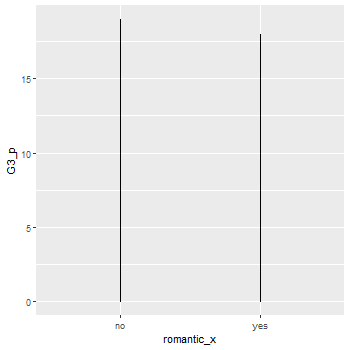

In [153]:
%%R -i student -w 5 -h 5 --units in -r 70

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(student, aes(x=romantic_x, y=G3_p)) + geom_line()
#python+R playtime

In [154]:
#probati jos jednom da nadjes ako ima impl.u pajtonu (AKO NE-probaj da napises metode)

In [155]:
#Nested stacking
#proba za prethodni dataset (samo matematika)

In [156]:
#Dependent binary relevance - DBR
#proba

### MEKA  //NE RADI